<a href="https://colab.research.google.com/github/avinashmane/colab/blob/master/strava_likers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code/Parameters
* Setup
    * needs
        * auth
        * gsheet auth
        * cfg_strava
* updates sheets
* Todo
    * low: error: location not found 

## Config

In [17]:
repo='https://github.com/avinashmane/colab.git'
import os,sys
if os.name=='nt':
    LIB= r'c:\m\lib'
    LOG= r'c:\m\social-media-automation'
    AUTH= r'c:\i\auth'
    sys.path.append("./lib")
else:
    if not os.path.exists('drive'):
        from google.colab import drive
        drive.mount('/content/drive')
    LIB='/content/drive/MyDrive/m/lib'
    LOG='/content/drive/MyDrive/m/lib'
    AUTH='/content/drive/MyDrive/m/auth'
    if not os.path.exists('m'):
      !ln -sd '/content/drive/MyDrive/m/' m
    if not os.path.exists('./repo'):
      !git clone $repo repo
    sys.path.append('repo')
    sys.path.append("repo/lib")
sys.path.append(LIB)


In [2]:
import yaml
cfg=yaml.load(u"""
repo:
    https://github.com/avinashmane/colab.git
packages: 
- chromium-chromedriver
modules:
- nerodia
- pygsheets
env:
    nt:
        LIB: c:/m/lib
        LOG: c:/m/social-media-automation
        AUTH: c:/i/auth
    posix:
        LIB: /content/drive/MyDrive/m/lib
        LOG: /content/drive/MyDrive/m/lib
        AUTH: /content/drive/MyDrive/m/auth
sheets:
    stravasync:
        url: https://docs.google.com/spreadsheets/d/1Q8SA641P0aytWzPGmeHG_xuxll3Wq6phsxjb91RjgWY/edit#gid=0
        tab: Members
        range: A10:O
    StravaPromoLog:
        url: https://docs.google.com/spreadsheets/d/14a8u53o0V6jKwP1nxk0334jvKsRnW6J5hKzcaQAwUbw/edit#gid=179675201
        tab: StravaPromoLog
        
""",Loader=yaml.Loader)
for x in cfg['env'][os.name]: 
    os.environ[x]=eval(x)

import importlib
import utils
importlib.reload(utils)
utils.setup_env(cfg['packages'],cfg['modules'])

'Environment setup'

## Code

In [15]:
import yaml
from datetime import datetime
import os
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image, Markdown
import pandas as pd

import utils

import socialmediasite 
importlib.reload(socialmediasite)
Strava=socialmediasite.Strava
SocialMediaSite=socialmediasite.SocialMediaSite


In [4]:
"reach gsheet"

import gsheets
Gsheet=gsheets.Gsheet


In [5]:
df_mc=Gsheet(cfg['sheets']['stravasync']['url']).getSheetDf(cfg['sheets']['stravasync']['tab'],start='A10')

# ssl=Gsheet('stravasync')
# df_mc

# Process
## Create headless

In [6]:
" Test Selenium headless"
if True:
    if os.name=='nt':
        b=Browser('chrome',)
    else:
        
        # import sys
        # sys.path.insert(0,f'{DIR}/geckodriver')
        from selenium import webdriver

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        # b =webdriver.Chrome('chromedriver',options=chrome_options)
        b=Browser('chrome',options=chrome_options,)
    
    utils.setLogger(f"{LOG}/strava-automation.log")
    

2022-08-23 10:59:54:INFO:Logger file: c:\m\social-media-automation/strava-automation.log


In [11]:

strava=Strava(b,authFile=f'{AUTH}/auth.yaml',cfgFile=f"{LIB}/cfg_strava.yaml")
strava.logGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetByTitle('StravaPromoLog')
strava.StravaMembers=df_mc.query('strava=="strava"').id.values

sessionGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetByTitle('SessionLog')

In [12]:
# strava.login("avinash")

# Image(b.screenshot.png())

## A. Give likes in feed

# b.goto('https://www.strava.com/clubs/196654/recent_activity')

# strava.scrolldown(9)

# logging.info(f"Total number of cards on {strava.browser.title}: {len(b.divs(class_name=re.compile('^EntryHeader')))}")

# strava.giveKudos()

In [13]:
# strava.logout()

## B. Give likes on Club

## avinash Feed Likes

ERROR! Session/line number was not unique in database. History logging moved to new session 3156


2022-08-23 11:04:29:INFO:Logged in with avinashmane@yahoo.com


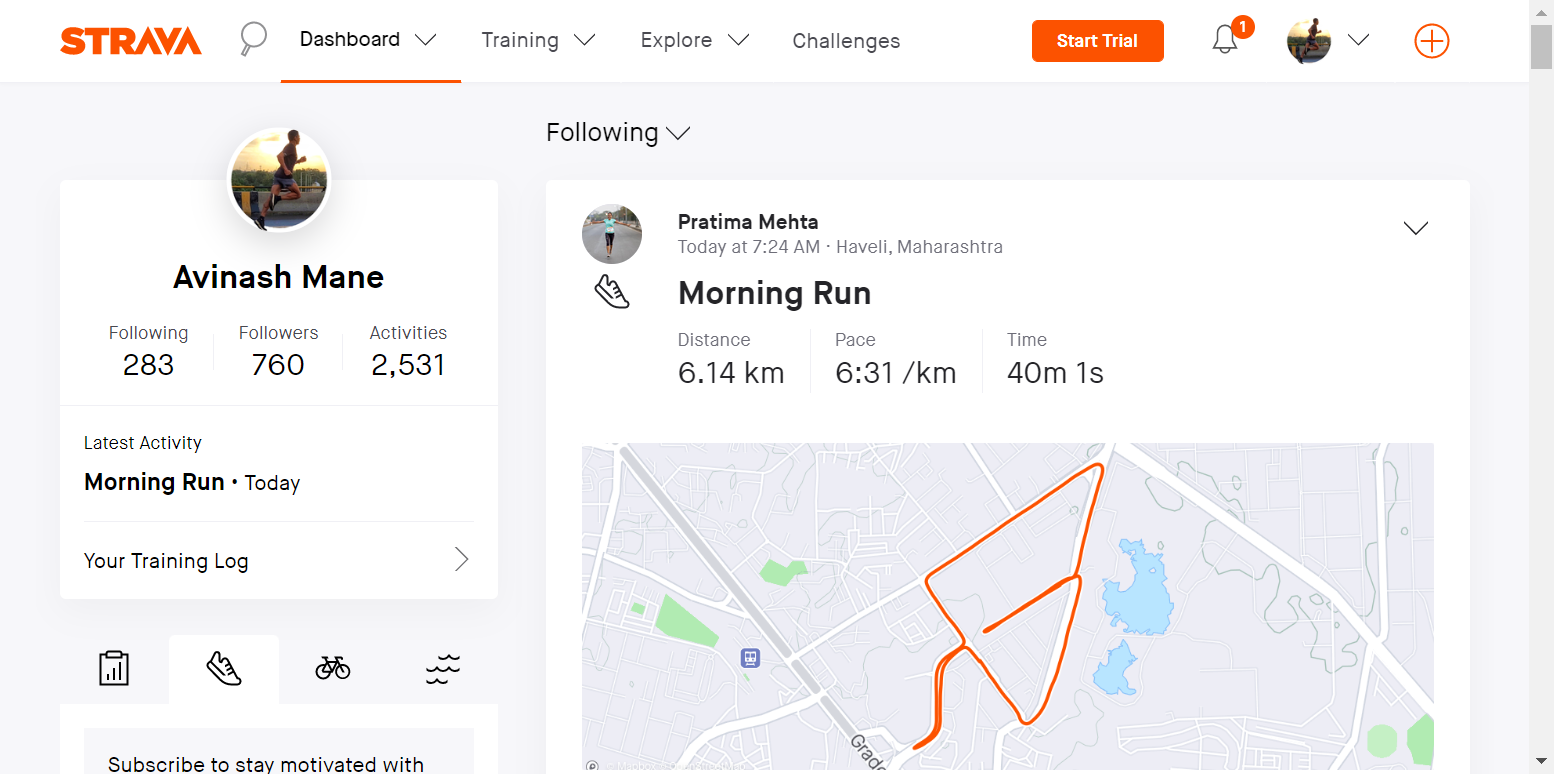

2022-08-23 11:04:39:INFO:Total number of cards on avinash/Dashboard | Strava: 78
2022-08-23 11:04:41:INFO:giveKudos: 0,31415659,https://www.strava.com/athletes/31415659 Pratima Mehta,https://www.strava.com/activities/7684176429 Morning Run
2022-08-23 11:04:43:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/21184773 Hans D.,https://www.strava.com/activities/7679977528 Wonderful weather, no traffic: Perfect conditions for a nice solo ride.


##  avinash https://www.strava.com/clubs/pcmcrunners Club Likes

2022-08-23 11:04:49:INFO:Total number of cards on https://www.strava.com/clubs/pcmcrunners 'Pimpri-Chinchwad, Maharashtra, India Club | PCMCRunners on Strava': 20
2022-08-23 11:04:51:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/47553513 Ahmed Raafat,https://www.strava.com/activities/7684192319 Morning Run
2022-08-23 11:04:53:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/27076910 priyanka gupta,https://www.strava.com/activities/7684182859 40 mins Cardio (treadmill)
2022-08-23 11:04:54:INFO:giveKudos: 2,52180262,https://www.strava.com/athletes/52180262 Jina Chetia,https://www.strava.com/activities/7684157382 Morning Run
2022-08-23 11:04:57:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/76849247 Vikas Sawant,https://www.strava.com/activities/7684170232 Morning Run
2022-08-23 11:04:58:INFO:giveKudos: 4,22573747,https://www.strava.com/athletes/22573747 Pretty Woman,https://www.strava.com/activities/7684222046 Morning Run


##  avinash https://www.strava.com/clubs/pcmcbikers Club Likes

2022-08-23 11:05:04:INFO:Total number of cards on https://www.strava.com/clubs/pcmcbikers 'Pimpri-Chinchwad, Maharashtra, India Club | PCMC Tring Tring on Strava': 20
2022-08-23 11:05:06:INFO:giveKudos: 0,8542102,https://www.strava.com/athletes/8542102 Kamal Tilani,https://www.strava.com/activities/7684133025 Morning Ride - HI-2
2022-08-23 11:05:08:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/65788924 Lou Matulac 🍁🌾🌴,https://www.strava.com/activities/7684208260 FulGaz - Canada Penticton IRONMAN


##  avinash https://www.strava.com/clubs/punecycling Club Likes

2022-08-23 11:05:13:INFO:Total number of cards on https://www.strava.com/clubs/punecycling 'Pune, Maharashtra, India Club | Strava Pune Cycling on Strava': 20
2022-08-23 11:05:15:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/26045060 Bombay Boy who Pedals,https://www.strava.com/activities/7684198533 Zwift - Downtown Titans in Watopia
2022-08-23 11:05:17:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/63702225 SR SHEKAR 🇮🇳,https://www.strava.com/activities/7684171541 Happy Tuesday 🌈🚴‍♂️
2022-08-23 11:05:19:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/98997113 Prathamesh Dhavale,https://www.strava.com/activities/7684141060 30 kms Morning Workout on inride 500
2022-08-23 11:05:21:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/6120790 Abdülkadir Ergin,https://www.strava.com/activities/7684136988 Morning Ride
2022-08-23 11:05:23:INFO:giveKudos: 4,8542102,https://www.strava.com/athletes/8542102 Kamal Tilani,https://www.strava.com/activiti

##  avinash https://www.strava.com/clubs/didyouruntoday Club Likes

2022-08-23 11:05:28:INFO:Total number of cards on https://www.strava.com/clubs/didyouruntoday 'Mumbai, Maharashtra, India Club | Did you run today on Strava': 20
2022-08-23 11:05:30:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/52384516 Emmanuel Fumbeshi,https://www.strava.com/activities/7684188628 Morning Run
2022-08-23 11:05:32:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/50006096 Effie Agong,https://www.strava.com/activities/7684215328 Morning Run


##  avinash https://www.strava.com/clubs/PuneWalkers Club Likes

2022-08-23 11:05:38:INFO:Total number of cards on https://www.strava.com/clubs/PuneWalkers 'Pune, Maharashtra, India Club | Pune Walkers on Strava': 20
2022-08-23 11:05:40:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/80405431 Marek Pavličko,https://www.strava.com/activities/7684084956 Lauf am Morgen ABC +3×1000🤗
2022-08-23 11:05:42:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/35809161 Sundarakannan Annadurai,https://www.strava.com/activities/7683931630 5k #135 (2022)
2022-08-23 11:05:44:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/66713213 $-AbᏂᎥshek Kaushik,https://www.strava.com/activities/7683915940 Morning walk
2022-08-23 11:05:46:INFO:giveKudos: 3,17891911,https://www.strava.com/athletes/17891911 Shekhar Gavali,https://www.strava.com/activities/7683906065 Morning Run
2022-08-23 11:05:48:INFO:giveKudos: 4,nonMember,https://www.strava.com/athletes/30635426 🚴‍♂️ Rahul Sancheti 🚴‍♂️,https://www.strava.com/activities/7683900102 Morning 5K Ru

##  avinash https://www.strava.com/clubs/prettycoolmileagechallenge Club Likes

2022-08-23 11:06:21:INFO:Total number of cards on https://www.strava.com/clubs/prettycoolmileagechallenge 'India Club | Milage Challenge : 2022 in 2022 on Strava': 20
2022-08-23 11:06:22:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/56727421 Bhika Chaudhari,https://www.strava.com/activities/7683749715 Morning Run


##  avinash https://www.strava.com/clubs/mileageleague Club Likes

2022-08-23 11:06:28:INFO:Total number of cards on https://www.strava.com/clubs/mileageleague 'Atlanta, Georgia Club | Mileage League: 2022 in 2022 on Strava': 20
2022-08-23 11:06:30:INFO:giveKudos: 0,31702944,https://www.strava.com/athletes/31702944 Rohit Shetty | RD,https://www.strava.com/activities/7683872320 Morning Weight Training
2022-08-23 11:06:32:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/96424784 Bhushan Vishwanath,https://www.strava.com/activities/7680782092 हि तो गणराजाची इच्छा.
2022-08-23 11:06:34:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/96424784 Bhushan Vishwanath,https://www.strava.com/activities/7680568828 Mon Sans BILD
2022-08-23 11:06:39:INFO:Logged out


## mileage_league_strava Feed Likes

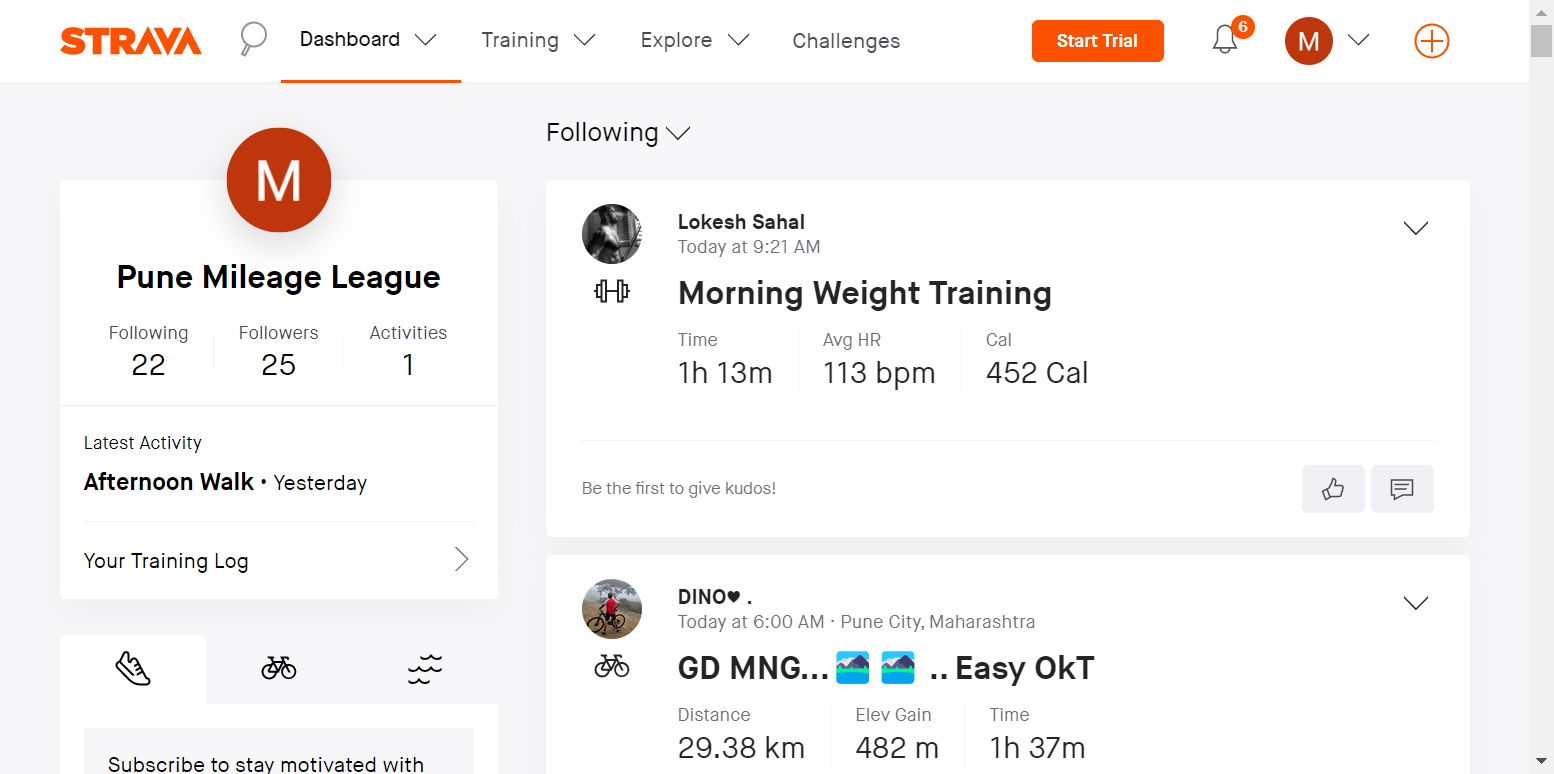

2022-08-23 11:06:56:INFO:Total number of cards on mileage_league_strava/Dashboard | Strava: 79
2022-08-23 11:06:58:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/53365581 Lokesh Sahal,https://www.strava.com/activities/7684165758 Morning Weight Training


##  mileage_league_strava https://www.strava.com/clubs/pcmcrunners Club Likes

2022-08-23 11:07:03:INFO:Total number of cards on https://www.strava.com/clubs/pcmcrunners 'Pimpri-Chinchwad, Maharashtra, India Club | PCMCRunners on Strava': 20
2022-08-23 11:07:05:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/47553513 Ahmed Raafat,https://www.strava.com/activities/7684192319 Morning Run
2022-08-23 11:07:08:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/27076910 priyanka gupta,https://www.strava.com/activities/7684182859 40 mins Cardio (treadmill)
2022-08-23 11:07:10:INFO:giveKudos: 2,52180262,https://www.strava.com/athletes/52180262 Jina Chetia,https://www.strava.com/activities/7684157382 Morning Run
2022-08-23 11:07:13:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/76849247 Vikas Sawant,https://www.strava.com/activities/7684170232 Morning Run
2022-08-23 11:07:14:INFO:giveKudos: 4,22573747,https://www.strava.com/athletes/22573747 Pretty Woman,https://www.strava.com/activities/7684222046 Morning Run


##  mileage_league_strava https://www.strava.com/clubs/pcmcbikers Club Likes

2022-08-23 11:07:21:INFO:Total number of cards on https://www.strava.com/clubs/pcmcbikers 'Pimpri-Chinchwad, Maharashtra, India Club | PCMC Tring Tring on Strava': 20
2022-08-23 11:07:23:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/65788924 Lou Matulac 🍁🌾🌴,https://www.strava.com/activities/7684208260 FulGaz - Canada Penticton IRONMAN


##  mileage_league_strava https://www.strava.com/clubs/punecycling Club Likes

2022-08-23 11:07:31:INFO:Total number of cards on https://www.strava.com/clubs/punecycling 'Pune, Maharashtra, India Club | Strava Pune Cycling on Strava': 20
2022-08-23 11:07:33:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/87398392 Gajanan Sarkale,https://www.strava.com/activities/7684230376 Solo Cycle Pune To Khadakwasala
2022-08-23 11:07:35:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/26045060 Bombay Boy who Pedals,https://www.strava.com/activities/7684198533 Zwift - Downtown Titans in Watopia
2022-08-23 11:07:37:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/63702225 SR SHEKAR 🇮🇳,https://www.strava.com/activities/7684171541 Happy Tuesday 🌈🚴‍♂️
2022-08-23 11:07:39:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/6120790 Abdülkadir Ergin,https://www.strava.com/activities/7684136988 Morning Ride


##  mileage_league_strava https://www.strava.com/clubs/didyouruntoday Club Likes

2022-08-23 11:07:44:INFO:Total number of cards on https://www.strava.com/clubs/didyouruntoday 'Mumbai, Maharashtra, India Club | Did you run today on Strava': 20
2022-08-23 11:07:46:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/52384516 Emmanuel Fumbeshi,https://www.strava.com/activities/7684188628 Morning Run
2022-08-23 11:07:47:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/50006096 Effie Agong,https://www.strava.com/activities/7684215328 Morning Run


##  mileage_league_strava https://www.strava.com/clubs/PuneWalkers Club Likes

2022-08-23 11:07:54:INFO:Total number of cards on https://www.strava.com/clubs/PuneWalkers 'Pune, Maharashtra, India Club | Pune Walkers on Strava': 20
2022-08-23 11:07:56:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/76919587 Vishal abnave,https://www.strava.com/activities/7683975203 Morning Run
2022-08-23 11:07:58:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/98304806 Mohammad Azam,https://www.strava.com/activities/7683766099 Morning Run
2022-08-23 11:08:00:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/65702938 Alejandro David González🌞😊🏃‍♂️🚴‍♂️🏊‍♂️,https://www.strava.com/activities/7683749894 Evening Run
2022-08-23 11:08:02:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/26622310 IRONMAN RAHUL NALAWADE ECO 🚴🏊🏃,https://www.strava.com/activities/7683739963 Morning Run
2022-08-23 11:08:04:INFO:giveKudos: 4,nonMember,https://www.strava.com/athletes/98304806 Mohammad Azam,https://www.strava.com/activities/7683731252 Morning Run
2022-0

##  mileage_league_strava https://www.strava.com/clubs/prettycoolmileagechallenge Club Likes

2022-08-23 11:08:18:INFO:Total number of cards on https://www.strava.com/clubs/prettycoolmileagechallenge 'India Club | Milage Challenge : 2022 in 2022 on Strava': 20
2022-08-23 11:08:19:INFO:giveKudos: 0,36256576,https://www.strava.com/athletes/36256576 Sudeep Srivastav,https://www.strava.com/activities/7665545827 Night Walk


##  mileage_league_strava https://www.strava.com/clubs/mileageleague Club Likes

2022-08-23 11:08:26:INFO:Total number of cards on https://www.strava.com/clubs/mileageleague 'Atlanta, Georgia Club | Mileage League: 2022 in 2022 on Strava': 20
2022-08-23 11:08:28:INFO:giveKudos: 0,31702944,https://www.strava.com/athletes/31702944 Rohit Shetty | RD,https://www.strava.com/activities/7683872320 Morning Weight Training
2022-08-23 11:08:30:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/96424784 Bhushan Vishwanath,https://www.strava.com/activities/7680782092 हि तो गणराजाची इच्छा.
2022-08-23 11:08:32:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/96424784 Bhushan Vishwanath,https://www.strava.com/activities/7680568828 Mon Sans BILD
2022-08-23 11:08:34:INFO:giveKudos: 3,26596647,https://www.strava.com/athletes/26596647 Nanda K R,https://www.strava.com/activities/7673625484 CD
2022-08-23 11:08:36:INFO:giveKudos: 4,26596647,https://www.strava.com/athletes/26596647 Nanda K R,https://www.strava.com/activities/7673501024 134-2022: Sun' Easy Run......on 

##  mileage_league_strava https://www.strava.com/clubs/weekendriderspune Club Likes

2022-08-23 11:09:00:INFO:Total number of cards on https://www.strava.com/clubs/weekendriderspune 'Pune, Maharashtra, India Club | WEEKEND CYCLE RIDES (PUNE) on Strava': 20
2022-08-23 11:09:02:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/69268520 Smeeta Patankar,https://www.strava.com/activities/7684238712 Morning Ride
2022-08-23 11:09:04:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/69268520 Smeeta Patankar,https://www.strava.com/activities/7684236105 🤩 NDA RIDE 😎
2022-08-23 11:09:06:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/47680990 Tasneem Poonawalla,https://www.strava.com/activities/7684212012 Wonderful ride with rk sir to cme
2022-08-23 11:09:08:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/72537604 Akshay Netankar,https://www.strava.com/activities/7684192066 Monday morning
2022-08-23 11:09:10:INFO:giveKudos: 4,nonMember,https://www.strava.com/athletes/26045060 Bombay Boy who Pedals,https://www.strava.com/activities/76841

##  mileage_league_strava https://www.strava.com/clubs/cycleforpune Club Likes

2022-08-23 11:09:31:INFO:Total number of cards on https://www.strava.com/clubs/cycleforpune 'Pune, Maharashtra, India Club | Cycle For Pune on Strava': 20
2022-08-23 11:09:33:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/69268520 Smeeta Patankar,https://www.strava.com/activities/7684238712 Morning Ride
2022-08-23 11:09:35:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/69268520 Smeeta Patankar,https://www.strava.com/activities/7684236105 🤩 NDA RIDE 😎
2022-08-23 11:09:37:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/87398392 Gajanan Sarkale,https://www.strava.com/activities/7684230376 Solo Cycle Pune To Khadakwasala
2022-08-23 11:09:40:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/26045060 Bombay Boy who Pedals,https://www.strava.com/activities/7684198533 Zwift - Downtown Titans in Watopia
2022-08-23 11:09:42:INFO:giveKudos: 4,nonMember,https://www.strava.com/athletes/102627790 Sumant Kshirsagar,https://www.strava.com/activities/7684

In [16]:
# b.goto('https://www.strava.com/clubs/196654/recent_activity')

for _user,_config in {
                    "avinash":"avinash",
                    "mileage_league_strava":"mileage_league_strava",
                    # "strava_pcmcrunners":"strava_pcmcrunners"
                    }.items():
    display(Markdown(f"## {_user} Feed Likes"))
    strava.login(_user)
    display(Image(b.screenshot.png()))
    strava.scrolldown(9) 
    _cards=len(b.divs(class_name=re.compile('^Card')))
    logging.info(f"Total number of cards on {_user}/{strava.browser.title}: {_cards}")
    ret=strava.giveKudos()
    #SessionLog :   Date	SessionType	User	Feed	cards	actions
    sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,'feed',_cards,ret['count']]])
    
    for club in strava.cfg[_config]['clubs']:
      display(Markdown(f"##  {_user} {club} Club Likes"))
      strava.goto(f"{club}/recent_activity")
      _cards=len(b.divs(class_name=re.compile('^Card')))
      logging.info(f"Total number of cards on {club} '{strava.browser.title}': {_cards}")
      ret=strava.giveKudos()
      #SessionLog :   Date	SessionType	User	Feed	cards	actions
      sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,club,_cards,ret['count']]])
    strava.logout()
logging.info(f"All Groups done")    

# End